## Phase-space decomposition via a machine-learned cubical complex 

First we import the functions that will be used.

In [15]:
from src.attractor_id.jupyter_functions import train_classifier, compute_homology, make_decomposition_plot, make_polytope_plot

### Code parameters

These are the parameters that can be changed before running the computation. The parameters set here override any parameters that are set in the configuration files.

The following systems are implemented:
- 'straight_separatrix'
- 'radial_2labels'
- 'radial_3labels'
- 'curved_separatrix'
- 'EMT'
- 'periodic'
- 'ellipsoidal_2d'
- 'DSGRN_2d_network'

In [16]:
system = 'DSGRN_2d_network'

N = 10 # number of nodes in the hidden layer of the network (must be an integer multiple of the dimension of the system)

labeling_threshold = 0.3 # threshold in (0, 1/2) used to label cubes

epochs = 20 # number of times that the data is cycled through during neural network training

### Train neural network

We obtained a trained model, which is a cubical neural network with a hidden layer of width ```N```.

In [17]:
model_filename = 'model'
model = train_classifier(system, N, epochs, model_filename)

Epoch 1/20
Test loss: 0.500740
Train loss: 0.498179
Epoch 2/20
Test loss: 0.418125
Train loss: 0.418135
Epoch 3/20
Test loss: 0.329597
Train loss: 0.335373
Epoch 4/20
Test loss: 0.246652
Train loss: 0.249568
Epoch 5/20
Test loss: 0.185539
Train loss: 0.198047
Epoch 6/20
Test loss: 0.152296
Train loss: 0.148051
Epoch 7/20
Test loss: 0.133254
Train loss: 0.142353
Epoch 8/20
Test loss: 0.121220
Train loss: 0.115246
Epoch 9/20
Test loss: 0.111251
Train loss: 0.117534
Epoch 10/20
Test loss: 0.105880
Train loss: 0.105166
Epoch 11/20
Test loss: 0.100902
Train loss: 0.111674
Epoch 12/20
Test loss: 0.097536
Train loss: 0.108272
Epoch 13/20
Test loss: 0.096754
Train loss: 0.094527
Epoch 14/20
Test loss: 0.097110
Train loss: 0.091476
Epoch 15/20
Test loss: 0.091836
Train loss: 0.091225
Epoch 16/20
Test loss: 0.090741
Train loss: 0.083757
Epoch 17/20
Test loss: 0.090445
Train loss: 0.093590
Epoch 18/20
Test loss: 0.088649
Train loss: 0.103105
Epoch 19/20
Test loss: 0.088395
Train loss: 0.085086
Ep

### Compute homology of labeled regions of the phase space decomposition obtained from the neural network

We compute the homology of each of the labeled regions according to the decomposition determined by the trained model. The output is the Betti numbers.

If the region is empty, this is specified.

We also compute the number of labeled cubes.

In [18]:
labeling_threshold = 0.1
hyperplane_list, cube_list = compute_homology(system, labeling_threshold, N, model)

Betti numbers of label 0 region: [1, 0, 0]
Betti numbers of label 1 region: [1, 0, 0]
Betti numbers of label 2 region: [1, 0, 0]
Betti numbers of uncertain region: [1, 0, 0]
Number of cubes labeled:  71


### Produce figure of phase space decomposition

The decomposition overlays points of phase space colored according to the value of the network.

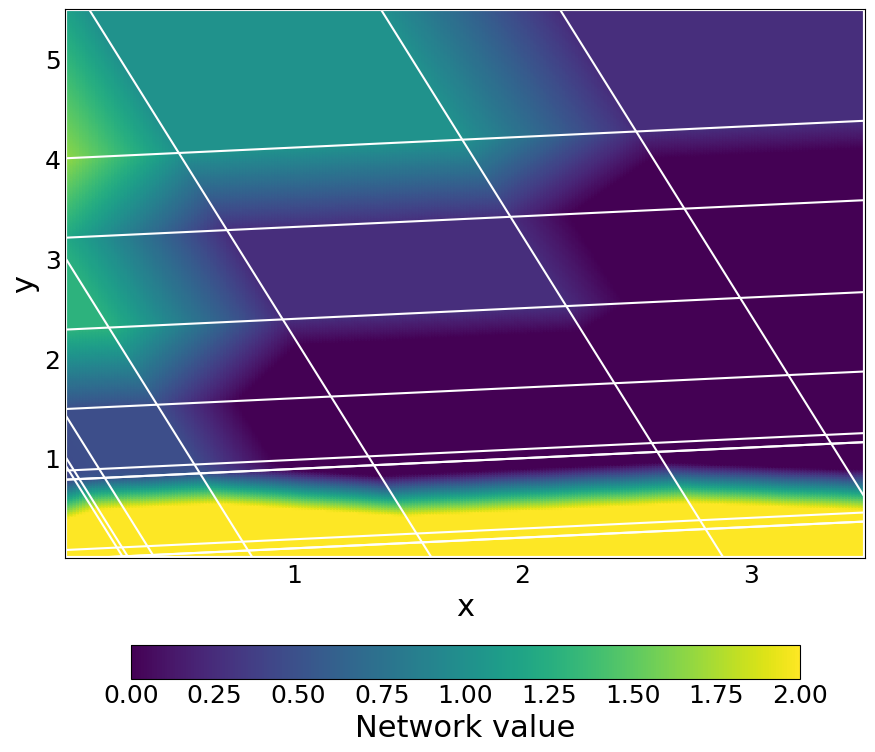

In [19]:
file_name = 'decomposition_plot'
make_decomposition_plot(system, hyperplane_list, model, file_name)

### Produce figure of labeled cubes

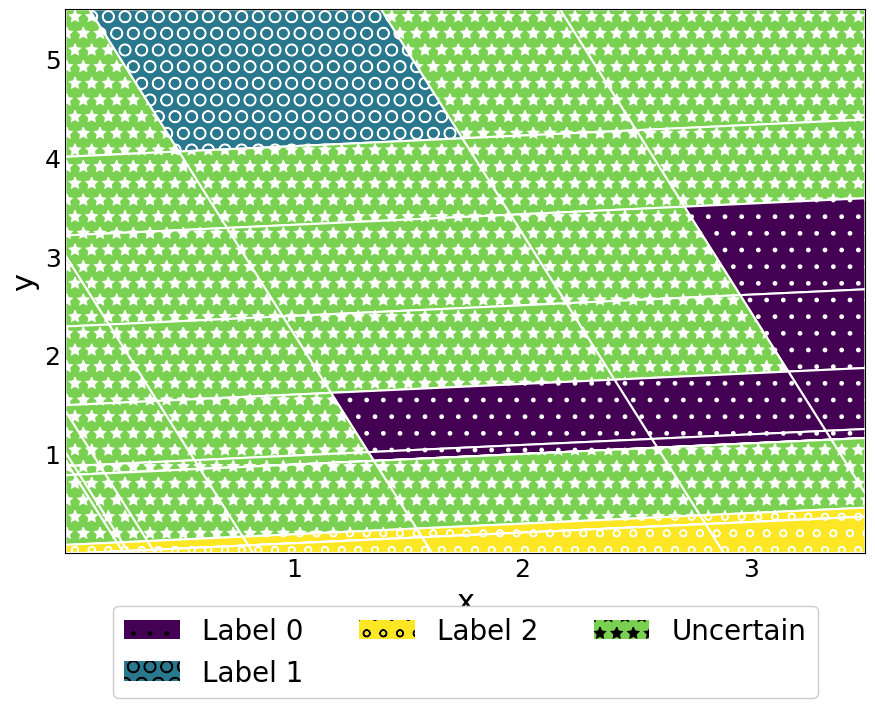

In [20]:
file_name = 'polytope_plot'
make_polytope_plot(system, cube_list, file_name)

### Changing further code parameters

Further parameters such as learning rate can be changed for each system in the configuration files in the folder ```config```. 

The following sentence if false at the moment. This computation used the data available at https://github.com/begelb/attractor-id-data. To use a local copy of data, change the parameter ```using_local_data``` to ```True``` and change the paths following ```train_data_file``` and ```test_data_file``` in the configuration file to the appropriate paths.